<a href="https://colab.research.google.com/github/PonAdityan/Cloud-Computing/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


plt.style.use('ggplot')

import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Read in data
df = pd.read_csv('Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


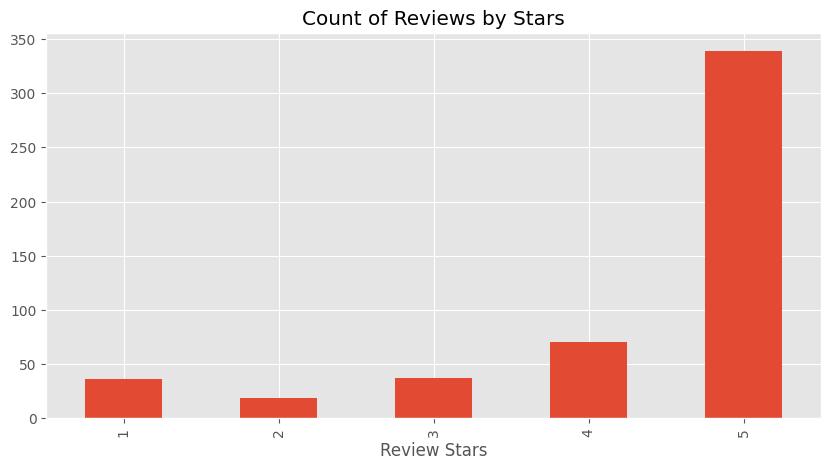

In [ ]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
#example = df['Text'][16]
example ="este producto no es bueno"
print(example)

este producto no es bueno


In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

NameError: name 'nltk' is not defined

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('love', 'VBP'),
 ('eating', 'VBG'),
 ('them', 'PRP'),
 ('and', 'CC'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ('good', 'JJ'),
 ('for', 'IN'),
 ('watching', 'VBG')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  love/VBP
  eating/VBG
  them/PRP
  and/CC
  they/PRP
  are/VBP
  good/JJ
  for/IN
  watching/VBG
  TV/NN
  and/CC
  looking/VBG
  at/IN
  movies/NNS
  !/.
  It/PRP
  is/VBZ
  not/RB
  too/RB
  sweet/JJ
  ./.
  I/PRP
  like/VBP
  to/TO
  transfer/VB
  them/PRP
  to/TO
  a/DT
  zip/NN
  lock/NN
  baggie/NN
  so/IN
  they/PRP
  stay/VBP
  fresh/JJ
  so/IN
  I/PRP
  can/MD
  take/VB
  my/PRP$
  time/NN
  eating/VBG
  them/PRP
  ./.)


In [ ]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

# Call the function with an example to get the scores_dict
example_text = "This is an example text."  # Replace with your desired text
result = polarity_scores_roberta(example_text)

# Now you can print the result
print(result)

{'roberta_neg': 0.15995069, 'roberta_neu': 0.1165736, 'roberta_pos': 0.25235003}


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


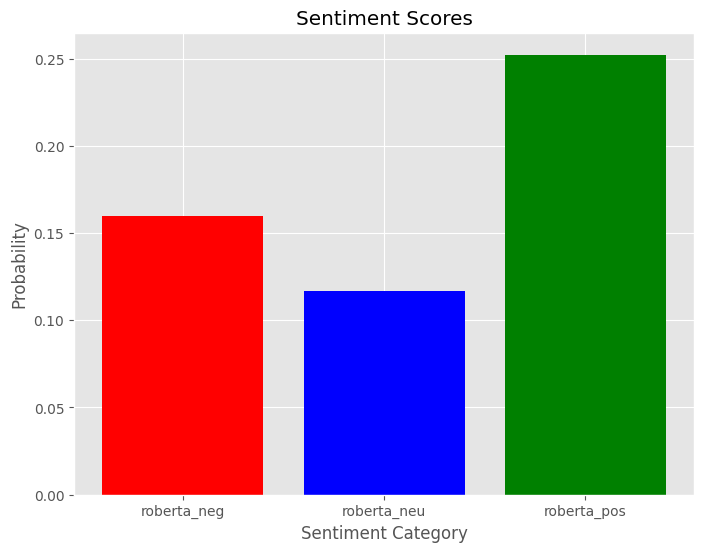

In [ ]:
# Visualize the scores
# First call the function and store its output to a variable called scores_dict.
# i.e call the function  polarity_scores_roberta as defined in cell ipython-input-24-fa3feee4eb0a
example_text = "This is an example text."
scores_dict = polarity_scores_roberta(example_text)

# Now that scores_dict is defined and available, get the keys and values
labels = list(scores_dict.keys())
values = list(scores_dict.values())

# The rest of your code can use 'scores_dict' as needed
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['red', 'blue', 'green'])
plt.title('Sentiment Scores')
plt.xlabel('Sentiment Category')
plt.ylabel('Probability')
plt.show()